In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.patches as mpatches

In [8]:
magnitude_pruning_df = pd.read_csv("rn50_magnitude_pruning.csv")
random_pruning_df = pd.read_csv("rn50_random_pruning.csv")
variational_dropout_df = pd.read_csv("rn50_variational_dropout.csv")
gRDA_df = pd.read_csv("rn50_gRDA_part.csv")
magnitude_pruning_v2_df = pd.read_csv("rn50_mag_v2.csv")
# gRDA_df = pd.read_csv("rn50_gRDA_part.csv")
# gRDA_xingyue_df = pd.read_csv("rn50_gRDA_xingyue.csv")

In [9]:
total_df = [gRDA_df, magnitude_pruning_df, random_pruning_df, variational_dropout_df, magnitude_pruning_v2_df]

In [4]:
# # plt.style.use('dark_background')
# names = ["gRDA", "magnitude_pruning", "random_pruning", "variational_dropout"]
# fig, axs = plt.subplots(1, 1)
# fig.set_figheight(8)
# fig.set_figwidth(10)

# for i in range(len(names)-1):
#     axs.scatter(total_df[i+1]['global sparsity'], total_df[i+1]['Accuracy'], label=names[i+1], s=10)
# axs.scatter(total_df[0]['global sparsity'], total_df[0]['Accuracy'], label=names[0], s=80, marker='x')


# axins = zoomed_inset_axes(axs, 2, loc="lower left", bbox_to_anchor=(250,150), borderpad=3)
# # axins = zoomed_inset_axes(axs_sub, 7, loc="lower left", bbox_to_anchor=(600,443), borderpad=3)
# mark_inset(axs, axins, loc1=2, loc2=4, fc="none", ec="0.5")
# axins.set_xlim([0.75,1])
# axins.set_ylim([0.65,0.75])
# axs_sub = axins
# for i in range(len(names)-1):
#     axs_sub.scatter(total_df[i+1]['global sparsity'], total_df[i+1]['Accuracy'], label=names[i+1], s=10)
# axs_sub.scatter(total_df[0]['global sparsity'], total_df[0]['Accuracy'], label=names[0], s=80, marker='x')

# gRDA_labels = list(gRDA_df['epoch'])
# for i, gRDA_label in enumerate(gRDA_labels):
#     axs_sub.annotate(gRDA_label, (total_df[0]['global sparsity'][i], total_df[0]['Accuracy'][i]))
# #     plt.text(total_df[0]['global sparsity'][i]+.001, total_df[0]['Accuracy'][i]+.001, gRDA_label, fontsize=9)


# arrow = mpatches.FancyArrowPatch((0.9, 0.66), (0.964,0.674), mutation_scale=50, color="r")
# axs_sub.add_patch(arrow)


# # textstr = """The labels on the red crosses are the epochs
# # we've run to get the results. (Labels with 'f' 
# # indicate using fastai learning rate schedule.)
# # All other results are from Gale et al. (trained 
# # using SGD with momentum, 100+ epochs.) """
# textstr = """The labels on the red crosses are the epochs
# we've run to get the results. 
# All other results are from Gale et al. (trained 
# using SGD with momentum, 100+ epochs.) """
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# axs.text(0.35, 0.18, textstr, transform=axs.transAxes, fontsize=12,
#         verticalalignment='top', bbox=props)
    
# axs.legend()
# axs.set_xlabel('sparsity')
# axs.set_ylabel('test_acc1_all')
# axs.set_title('Compare gRDA to other methods in (Gale et al.) (ResNet50, Imagenet)')


# # plt.savefig("compare_gale_gRDA_light_with_arrow.pdf")
# # plt.savefig("compare_gale_gRDA_light_with_arrow.png")

In [10]:
list(gRDA_df['epoch'])

[150, 146, 148, 150, 151, 144, 153]

In [11]:
total_df[4]['global sparsity']

0    0.800
1    0.900
2    0.950
3    0.965
Name: global sparsity, dtype: float64

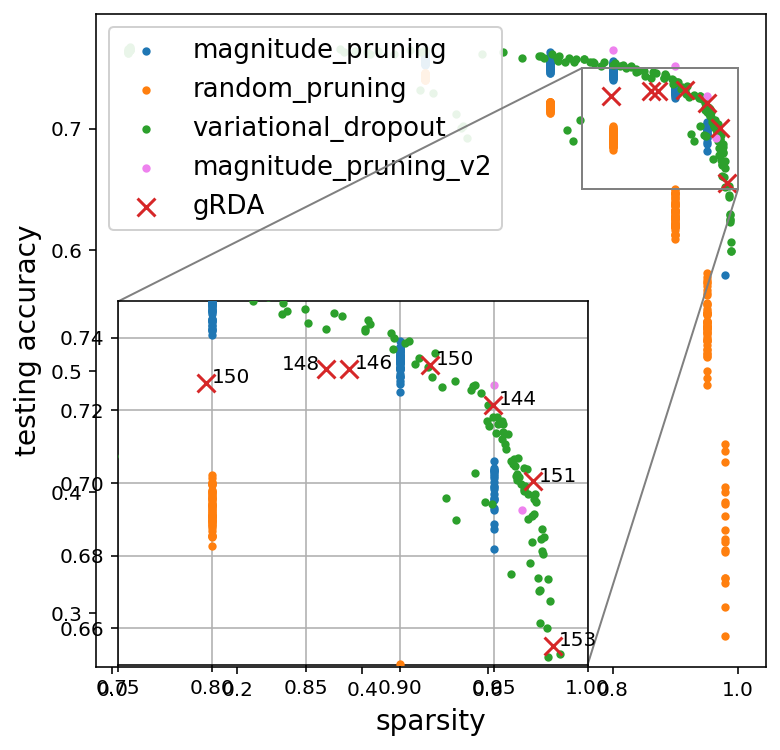

In [23]:
# small version

names = ["gRDA", "magnitude_pruning", "random_pruning", "variational_dropout", "magnitude_pruning_v2"]
fig, axs = plt.subplots(1, 1)
fig.set_figheight(6)
fig.set_figwidth(6)

for i in range(len(names)-2):
    axs.scatter(total_df[i+1]['global sparsity'], total_df[i+1]['Accuracy'], label=names[i+1], s=10)
axs.scatter(total_df[4]['global sparsity'], total_df[4]['Accuracy'], label=names[4], s=10, color='violet')
axs.scatter(total_df[0]['global sparsity'], total_df[0]['Accuracy'], label=names[0], s=80, marker='x')


axins = zoomed_inset_axes(axs, 3, loc="lower left", bbox_to_anchor=(70,50), borderpad=3)
# axins = zoomed_inset_axes(axs_sub, 7, loc="lower left", bbox_to_anchor=(600,443), borderpad=3)
mark_inset(axs, axins, loc1=2, loc2=4, fc="none", ec="0.5")
axins.set_xlim([0.75,1])
axins.set_ylim([0.65,0.75])
axs_sub = axins
axs_sub.grid(zorder=0)
for i in range(len(names)-2):
    axs_sub.scatter(total_df[i+1]['global sparsity'], total_df[i+1]['Accuracy'], label=names[i+1], s=10, zorder=3)
axs_sub.scatter(total_df[4]['global sparsity'], total_df[4]['Accuracy'], label=names[4], s=10, color='violet')
axs_sub.scatter(total_df[0]['global sparsity'], total_df[0]['Accuracy'], label=names[0], s=80, marker='x', zorder=3)

gRDA_labels = list(gRDA_df['epoch'])
for i, gRDA_label in enumerate(gRDA_labels):
    if gRDA_label == 148:
        axs_sub.annotate(gRDA_label, (total_df[0]['global sparsity'][i]-0.024, total_df[0]['Accuracy'][i]), fontsize=10)
    elif gRDA_label > 120:
        axs_sub.annotate(gRDA_label, (total_df[0]['global sparsity'][i]+0.003, total_df[0]['Accuracy'][i]), fontsize=10)
    elif gRDA_label == 105:
        axs_sub.annotate(gRDA_label, (total_df[0]['global sparsity'][i]+0.003, total_df[0]['Accuracy'][i]), fontsize=10)
    else:
        axs_sub.annotate(gRDA_label, (total_df[0]['global sparsity'][i]-0.018, total_df[0]['Accuracy'][i]), fontsize=10)
#     plt.text(total_df[0]['global sparsity'][i]+.001, total_df[0]['Accuracy'][i]+.001, gRDA_label, fontsize=9)


# arrow = mpatches.FancyArrowPatch((0.9, 0.66), (0.964,0.674), mutation_scale=50, color="r")
# axs_sub.add_patch(arrow)


# textstr = """The labels on the red crosses are the epochs
# we've run to get the results. (Labels with 'f' 
# indicate using fastai learning rate schedule.)
# All other results are from Gale et al. (trained 
# using SGD with momentum, 100+ epochs.) """
# textstr = """The labels on the red crosses are the epochs
# we've run to get the results. 
# All other results are from Gale et al. (trained 
# using SGD with momentum, 100+ epochs.) """
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# axs.text(0.5, 0.18, textstr, transform=axs.transAxes, fontsize=12,
#         verticalalignment='top', horizontalalignment='center', bbox=props)
    
axs.legend(loc='upper left', framealpha=0.9, fontsize=13)
axs.set_xlabel('sparsity', fontsize=14)
axs.set_ylabel('testing accuracy', fontsize=14)
# axs.set_title('Compare gRDA to other methods in (Gale et al.) (ResNet50)')


plt.savefig("compare_gale_gRDA_light_with_arrow_v2-largefont.pdf")
# plt.savefig("compare_gale_gRDA_light_with_arrow.png")